In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6534,5195-KPUNQ,Female,1,No,No,53,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Mailed check,96.75,5206.55,No
1185,5673-FSSMF,Female,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.15,60.15,Yes
6756,1754-GKYPY,Male,1,Yes,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89.75,1938.9,No
4169,3663-MITLP,Female,0,No,No,15,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,1457.25,Yes
4430,5061-PBXFW,Female,0,Yes,Yes,32,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.40,1864.65,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

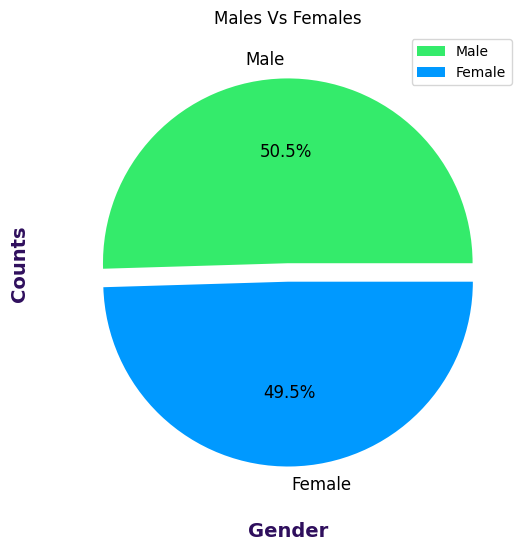

In [9]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [10]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [11]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

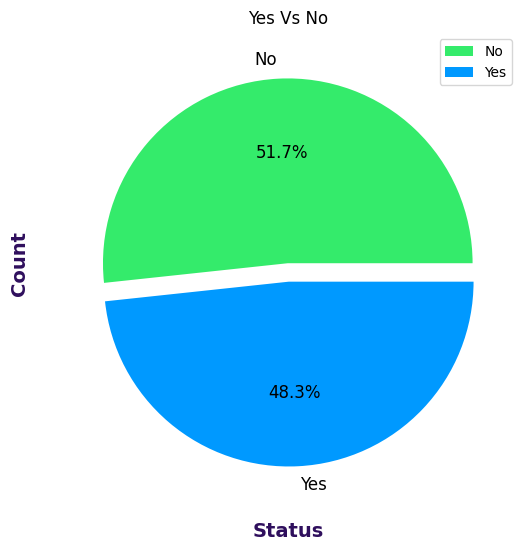

In [12]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["Partner"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes Vs No')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [13]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})

In [14]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

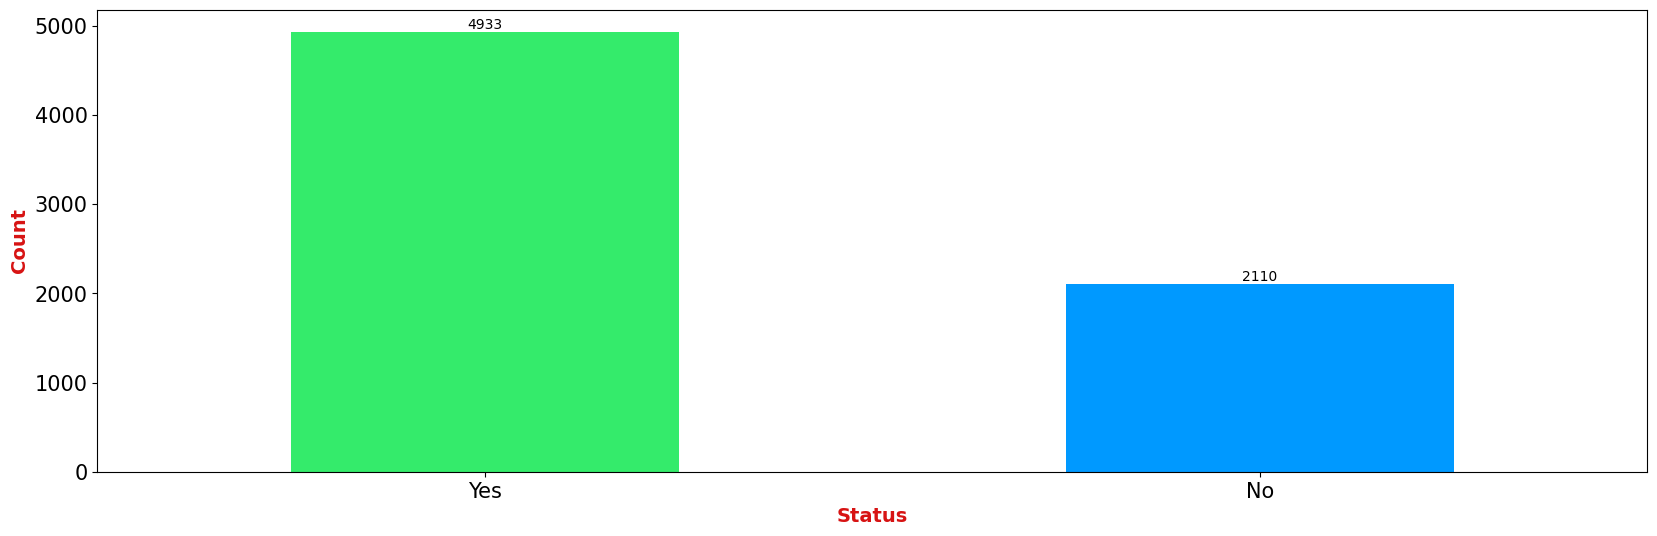

In [15]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["Dependents"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);


In [16]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})

In [17]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

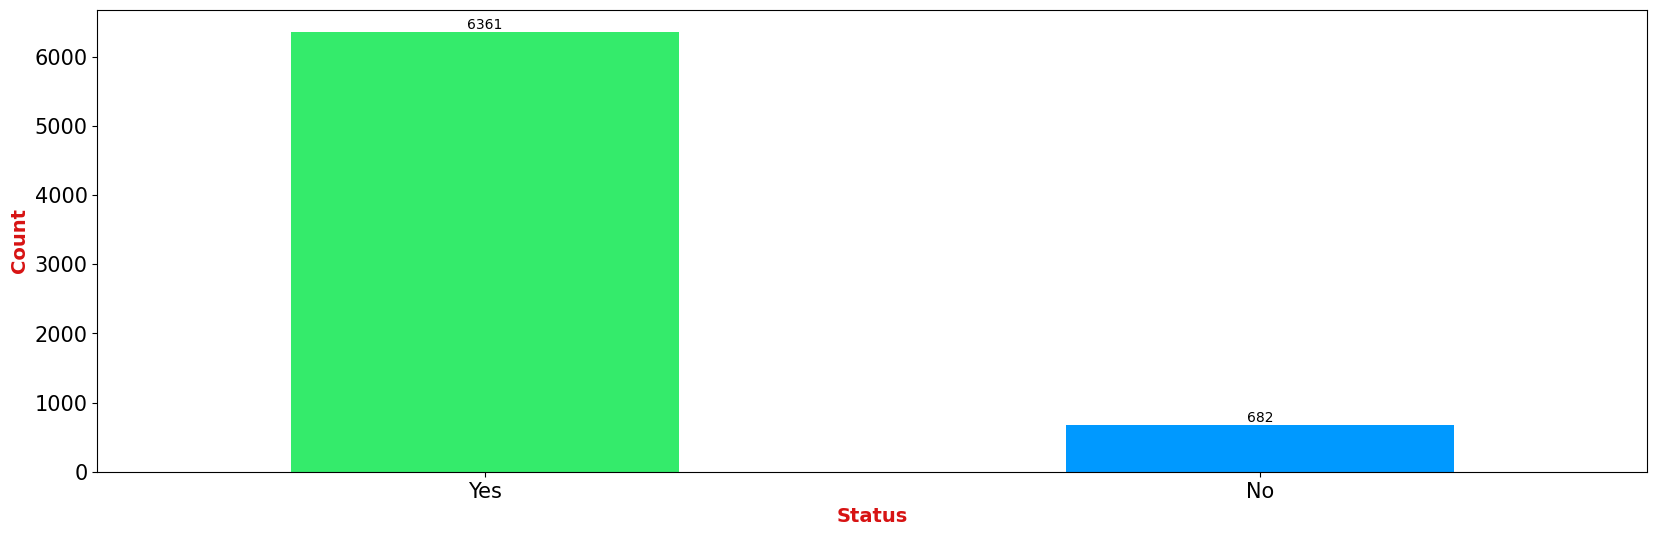

In [18]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["PhoneService"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

In [19]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

In [20]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

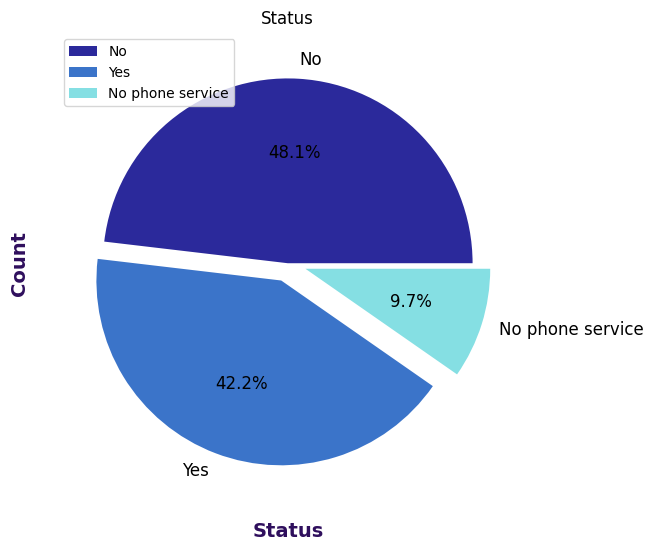

In [21]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = df["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [22]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

df['MultipleLines'] = df['MultipleLines'].map(mapping_dict)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df.InternetService = le.fit_transform(df.InternetService)

In [25]:
df.Contract = le.fit_transform(df.Contract)

In [26]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

In [27]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3186,1,0,1,1,58,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,1,20.30,1160.75,No
4818,0,1,1,0,64,1,0,1,Yes,No,Yes,No,No,No,1,No,1,80.30,5017.7,No
6691,1,0,0,0,39,0,0,0,Yes,Yes,No,Yes,No,No,1,No,0,41.15,1700.9,No
1523,0,0,0,0,8,1,0,0,No,No,No,No,No,No,0,No,3,43.55,335.4,No


In [28]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [30]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [31]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,0,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,0,0,0,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,1,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,0,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,1,0,1,1,0,0,0,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,0,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,0,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,1,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,1,0,1,1,0,1,1,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [32]:
df.shape


(7043, 20)

In [33]:

df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [34]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [35]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
gender,int64,0,0.000000,2,7032
SeniorCitizen,int64,0,0.000000,2,7032
Partner,int64,0,0.000000,2,7032
Dependents,int64,0,0.000000,2,7032
tenure,float64,0,0.000000,72,7032
PhoneService,int64,0,0.000000,2,7032
MultipleLines,int64,0,0.000000,2,7032
InternetService,int64,0,0.000000,3,7032
OnlineSecurity,int64,0,0.000000,2,7032
OnlineBackup,int64,0,0.000000,2,7032


In [36]:
X = df.drop('Churn',axis='columns')
y = df['Churn']


In [37]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2459,0,0,0,0,0.098592,1,0,2,0,0,0,0,0,0,0,1,1,0.021891,0.016559
4173,1,0,0,0,0.154930,1,1,1,0,0,0,0,0,1,0,1,2,0.679602,0.120944
5904,1,0,0,0,0.971831,1,1,1,0,1,0,0,1,1,1,0,2,0.802488,0.786961


In [38]:
y.sample(3)

3249    0
6163    0
4279    0
Name: Churn, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
X_train.shape

(5625, 19)

In [41]:
X_test.shape

(1407, 19)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7084
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7829
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7886
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7948
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7956
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7996
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7996
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8009
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8027
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accura

In [44]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7797


[0.4658506214618683, 0.7796730399131775]

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 1ms/step


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.66      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



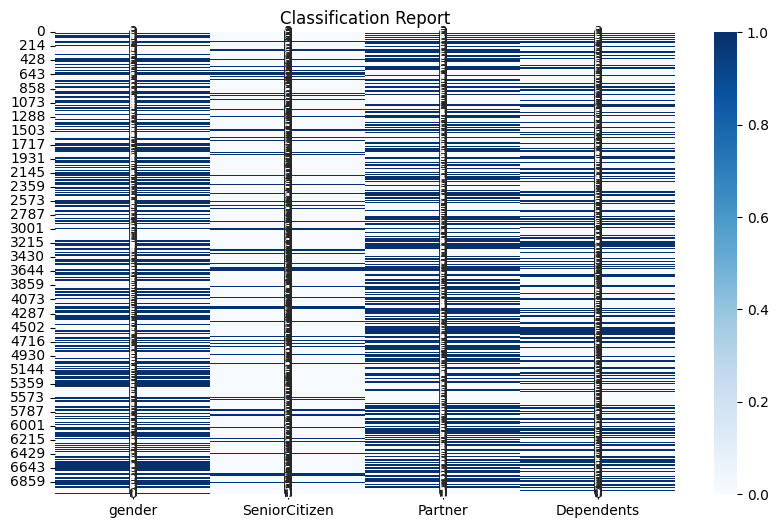

In [48]:
report = classification_report(y_test, y_pred, output_dict=True)
rep = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :4], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [50]:
classes = [str(key) for key in range(len(report) - 3)]
precision = [report[key]['precision'] for key in classes]
recall = [report[key]['recall'] for key in classes]
f1_score = [report[key]['f1-score'] for key in classes]

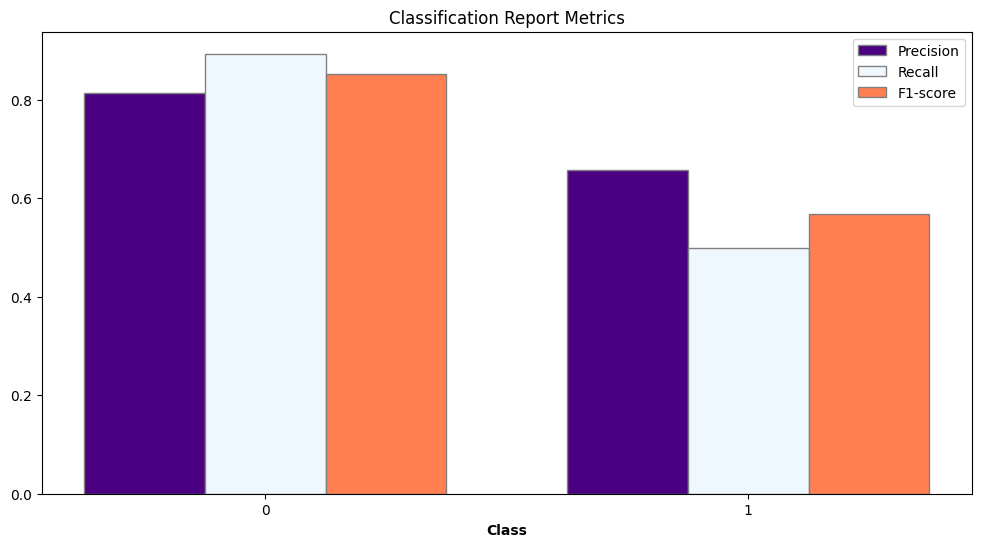

In [51]:
plt.figure(figsize=(12, 6))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='#4b0082', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='#f0f8ff', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='#ff7f50', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.legend()
plt.title("Classification Report Metrics")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

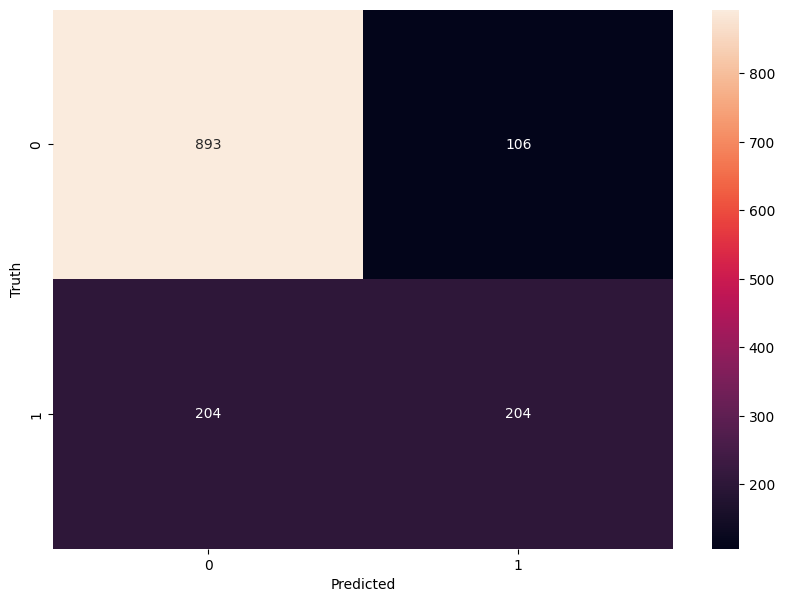

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')